In [15]:
import os

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!cp /content/drive/MyDrive/DATA/RAVDESS-dataset/VideoFilesFinal.zip .
!unzip VideoFilesFinal.zip

Archive:  VideoFilesFinal.zip
replace visual_frames_final/01/Actor_15=01-02-01-01-01-02-15=0008.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace visual_frames_final/01/Actor_15=01-02-01-01-01-02-15=0009.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!cp /content/drive/MyDrive/DATA/RAVDESS-dataset/AudioFilesFinal.zip .
!unzip AudioFilesFinal.zip 

Archive:  AudioFilesFinal.zip
   creating: Audio_Songs_Actors_01-24/
   creating: Audio_Songs_Actors_01-24/Actor_01/
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-02-02-01-02-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-02-02-02-02-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-02-01-01-02-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-01-01-01-02-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-02-01-01-01-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-02-01-02-02-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-03-01-01-02-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-02-02-01-01-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-01-01-02-01-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-03-01-02-01-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-02-02-02-01-01.wav  
  inflating: Audio_Songs_Actors_01-24/Actor_01/03-02-03-01-02-02-01.w

In [18]:
# importing all the required libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import IPython.display as ipd

In [19]:
from torchvision import transforms
from tqdm import tqdm

In [20]:
import glob
from PIL import Image

In [21]:
visual_images_path = '/content/visual_frames_final'
all_image_files = sorted(glob.glob('/content/visual_frames_final/*/*.jpg'))

In [22]:
all_audio_files = sorted(glob.glob('/content/Audio*/*/*.wav'))

In [23]:
len(all_audio_files), len(all_image_files)

(2496, 62042)

In [24]:
label_to_emotion = {'01':'neutral', 
                    '02': 'calm', 
                    '03': 'happy',
                    '04': 'sad',
                    '05': 'angry',
                    '06': 'fearful',
                    '07': 'disgust',
                    '08': 'surprised'}

In [ ]:
FILES = {'filepath':[], 
         'label':[], 
         'emotion': [],
         'actor':[], 
         'intensity': [], 
         'duration': [],
         'image_paths': []}
want_duration = False
for wav_file in tqdm(all_audio_files):
  filename = wav_file.replace('.wav', '')
  label = os.path.basename(filename).split('-')[2]
  intensity = os.path.basename(filename).split('-')[3]
  actor = os.path.basename(filename).split('-')[-1]
  
  # filling the dictionary
  FILES['filepath'].append(wav_file)
  FILES['label'].append(label)
  FILES['emotion'].append(label_to_emotion[label])
  FILES['actor'].append(actor)
  FILES['intensity'].append(intensity)
  if want_duration:
    FILES['duration'].append(librosa.get_duration(filename=wav_file))
  else:
    FILES['duration'].append(0.0)
  
  # for video face extraction
  video_file = wav_file
  vid_tag = "=".join(video_file.split('/')[-2:]).replace('.wav', '')
  label = os.path.basename(video_file).split('-')[2]
  label_dir = os.path.join(visual_images_path, label)

  savepath = os.path.join(label_dir, f'{vid_tag}=*.jpg').replace('=03-', '=01-')
  imgpaths = sorted(glob.glob(savepath)) or 'NAH'

  FILES['image_paths'].append(imgpaths)


100%|██████████| 2496/2496 [00:28<00:00, 88.53it/s]


In [25]:
df = pd.DataFrame(FILES)
df

,filepath,label,emotion,actor,intensity,duration,image_paths
0,/content/Audio_Songs_Actors_01-24/Actor_01/03-...,01,neutral,01,01,0.0,[/content/visual_frames_final/01/Actor_01=01-0...
1,/content/Audio_Songs_Actors_01-24/Actor_01/03-...,01,neutral,01,01,0.0,[/content/visual_frames_final/01/Actor_01=01-0...
2,/content/Audio_Songs_Actors_01-24/Actor_01/03-...,01,neutral,01,01,0.0,[/content/visual_frames_final/01/Actor_01=01-0...
3,/content/Audio_Songs_Actors_01-24/Actor_01/03-...,01,neutral,01,01,0.0,[/content/visual_frames_final/01/Actor_01=01-0...
4,/content/Audio_Songs_Actors_01-24/Actor_01/03-...,02,calm,01,01,0.0,[/content/visual_frames_final/02/Actor_01=01-0...
...,...,...,...,...,...,...,...
2491,/content/Audio_Speech_Actors_01-24/Actor_24/03...,08,surprised,24,01,0.0,[/content/visual_frames_final/08/Actor_24=01-0...
2492,/content/Audio_Speech_Actors_01-24/Actor_24/03...,08,surprised,24,02,0.0,[/content/visual_frames_final/08/Actor_24=01-0...
2493,/content/Audio_Speech_Actors_01-24/Actor_24/03...,08,surprised,24,02,0.0,[/content/visual_frames_final/08/Actor_24=01-0...
2494,/content/Audio_Speech_Actors_01-24/Actor_24/03...,08,surprised,24,02,0.0,[/content/visual_frames_final/08/Actor_24=01-0...


In [26]:
# df.iloc[0].image_paths

In [27]:
from collections import Counter

Counter(df.emotion)

Counter({'angry': 384,
         'calm': 384,
         'disgust': 192,
         'fearful': 384,
         'happy': 384,
         'neutral': 192,
         'sad': 384,
         'surprised': 192})

In [28]:
# to split the data into training and validation
from sklearn.model_selection import train_test_split

In [29]:
train_df, dev_df = train_test_split(df, shuffle=True, stratify=df['label'], test_size=0.15, random_state=6)
dev_df, test_df = train_test_split(dev_df, shuffle=True, stratify=dev_df['label'], test_size=0.5, random_state=6)

train_df.shape, dev_df.shape, test_df.shape

((2121, 7), (187, 7), (188, 7))

In [30]:
train_df = train_df[train_df.image_paths!='NAH']
dev_df = dev_df[dev_df.image_paths!='NAH']
test_df = test_df[test_df.image_paths!='NAH']

train_df.shape, dev_df.shape, test_df.shape

((2075, 7), (183, 7), (184, 7))

In [31]:
print(Counter(train_df.emotion))
print(Counter(dev_df.emotion))
print(Counter(test_df.emotion))

Counter({'sad': 321, 'fearful': 320, 'happy': 319, 'angry': 319, 'calm': 316, 'surprised': 163, 'disgust': 163, 'neutral': 154})
Counter({'happy': 29, 'angry': 28, 'sad': 28, 'calm': 28, 'fearful': 27, 'disgust': 15, 'surprised': 15, 'neutral': 13})
Counter({'angry': 29, 'fearful': 29, 'calm': 29, 'happy': 28, 'sad': 27, 'neutral': 14, 'surprised': 14, 'disgust': 14})


In [32]:
SAMPLE_RATE = 16000
NMFCCs = 13

In [33]:
# t = 13
# r = 3
# kk = np.arange(t)
# for i in range(0, t, r):
#   kk_ = kk[i:i+r]
#   if len(kk_)!=r:
#     kk_ = kk[i - r + len(kk_):]
#   print(kk_)

In [34]:
# !pip install torchaudio

In [35]:
import torchaudio

In [36]:
# as a method to deal with overfitting from the previous model;
# we are adding specaug for audio and image transformation for video
# audio transforms
train_audio_transforms = torch.nn.Sequential(torchaudio.transforms.FrequencyMasking(freq_mask_param=4),
                                             torchaudio.transforms.FrequencyMasking(freq_mask_param=4),
                                             torchaudio.transforms.TimeMasking(time_mask_param=25),
                                             torchaudio.transforms.TimeMasking(time_mask_param=25))
test_audio_transforms = None

print("Audio transforms...")
print(train_audio_transforms)
print(test_audio_transforms)

# video transforms
train_vision_transforms = transforms.Compose([transforms.RandomHorizontalFlip(),
                                              transforms.RandomAffine((-5, 5)),
                                              transforms.ColorJitter(),
                                              transforms.RandomPerspective(0.1),
                                              # transforms.RandomGrayscale(p=0.1),
                                              # transforms.CenterCrop(58),
                                              # transforms.Resize((64, 64)),
                                              transforms.ToTensor(),
                                              transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                                              transforms.RandomErasing(p=0.2, inplace=True)])


test_vision_transforms = transforms.Compose([transforms.ToTensor(),
                                             transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
print("Vision transforms...")
print(train_vision_transforms)
print(test_vision_transforms)


Audio transforms...
Sequential(
  (0): FrequencyMasking()
  (1): FrequencyMasking()
  (2): TimeMasking()
  (3): TimeMasking()
)
None
Vision transforms...
Compose(
    RandomHorizontalFlip(p=0.5)
    RandomAffine(degrees=[-5.0, 5.0])
    ColorJitter(brightness=None, contrast=None, saturation=None, hue=None)
    RandomPerspective(p=0.5)
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    RandomErasing(p=0.2, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=True)
)
Compose(
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)


In [37]:
class AudioVideoDatasetV2(torch.utils.data.Dataset):
  def __init__(self, df, audio_transforms, video_transforms):
    self.df = df
    self.audio_transforms = audio_transforms
    self.video_transforms = video_transforms
    self.duration_required = 2 #2seconds
    self.images_required = 4
    self.audio_data = {}
    self.video_data = {}
    # load all the audio files and convert them into spectrograms 
    print("Loading all the audio and video files on to RAM...")
    self.DATAHANDLES = []

    for lineno in tqdm(range(self.df.shape[0])):
      line = self.df.iloc[lineno]
      wavpath = line.filepath
      audio_duration = librosa.get_duration(filename=wavpath)
      audio, sr = librosa.load(wavpath, 
                             sr=SAMPLE_RATE, 
                             duration=self.duration_required, 
                             offset=audio_duration/2 - self.duration_required/2)
      mel_spec = librosa.feature.mfcc(audio, sr=SAMPLE_RATE, n_mfcc=NMFCCs)
      self.audio_data[wavpath] = mel_spec

      for imgpath in line.image_paths:
        img = Image.open(imgpath)
        self.video_data[imgpath] = img

      for ino in range(0, len(line.image_paths), self.images_required):
        imgs = line.image_paths[ino:ino+self.images_required]
        # print("LEN", len(imgs), len(line.image_paths))
        if len(imgs) != self.images_required:
          imgs = line.image_paths[max(0, ino - self.images_required - len(imgs)):]
          # print("broke len", len(imgs), len(line.image_paths))
        if len(imgs) != self.images_required: 
          # print("Assertion failed for ", lineno)
          continue
        self.DATAHANDLES.append({'label':line.label, 'audio':line.filepath, 'video':imgs})

    print(f"Done loading: Audio data: {len(self.audio_data)}\tVideo files: {len(self.video_data)}")
    print(f"Total Samples here: {len(self.DATAHANDLES)}")

  def __len__(self):
    return len(self.DATAHANDLES)

  def __getitem__(self, idx):
    line = self.DATAHANDLES[idx]
    label = int(line['label']) - 1
    mel_spec = torch.Tensor(self.audio_data[line['audio']])
    images = torch.cat([self.video_transforms(self.video_data[x]) for x in line['video']], dim=2)
    if self.audio_transforms is not None:
      mel_spec_tensor = self.audio_transforms(torch.Tensor(mel_spec))
    else:
      mel_spec_tensor = torch.Tensor(mel_spec)
    return mel_spec_tensor , images, torch.Tensor([label])

In [38]:
train_dataset = AudioVideoDatasetV2(train_df, train_audio_transforms, train_vision_transforms)
train_dataloader = torch.utils.data.DataLoader(train_dataset, 
                                               shuffle=True, 
                                               batch_size=128, 
                                               num_workers=8)


dev_dataset = AudioVideoDatasetV2(dev_df, test_audio_transforms, test_vision_transforms)
dev_dataloader = torch.utils.data.DataLoader(dev_dataset, 
                                             shuffle=False, 
                                             batch_size=32, 
                                             num_workers=8)


test_dataset = AudioVideoDatasetV2(test_df, test_audio_transforms, test_vision_transforms)
test_dataloader = torch.utils.data.DataLoader(test_dataset, 
                                             shuffle=False, 
                                             batch_size=32, 
                                             num_workers=8)



Loading all the audio and video files on to RAM...


100%|██████████| 2075/2075 [04:43<00:00,  7.33it/s]


Done loading: Audio data: 2075	Video files: 26316
Total Samples here: 5705
Loading all the audio and video files on to RAM...


100%|██████████| 183/183 [00:24<00:00,  7.33it/s]


Done loading: Audio data: 183	Video files: 2314
Total Samples here: 498
Loading all the audio and video files on to RAM...


100%|██████████| 184/184 [00:25<00:00,  7.31it/s]

Done loading: Audio data: 184	Video files: 2333
Total Samples here: 505


In [39]:
for i, batch in enumerate(train_dataloader):
  audio, video, label = batch
  break

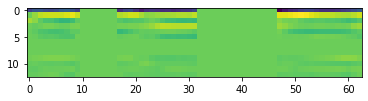

In [40]:
plt.imshow(audio[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


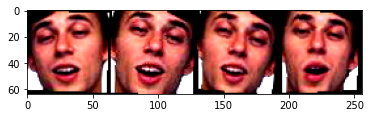

In [41]:
plt.imshow(video[0].permute(1, 2, 0)/2 + 0.5)

In [42]:
print(len(train_dataset), len(dev_dataset), len(test_dataset))
print(len(train_dataloader), len(dev_dataloader), len(test_dataloader))

5705 498 505
45 16 16


In [43]:
# audio model for our multimodal training
class BasicAudioRnnModel(torch.nn.Module):
  def __init__(self, input_size=128, hidden_size=512,num_layers=3, isBidirectional=False):
    super().__init__()
    self.hidden_size = hidden_size
    self.linearIn = 2*hidden_size if isBidirectional else hidden_size
    self.rnn = torch.nn.GRU(input_size=input_size, 
                            hidden_size=hidden_size, 
                            num_layers=num_layers,
                            batch_first=True, 
                            dropout = 0.3, #only for GRU and LSTM not for RNN
                            bidirectional=isBidirectional) #Test with unidirectional
    # self.linear = torch.nn.Linear(self.linearIn, num_classes) 
    self.out_shape = self.linearIn
  def forward(self, X):
    out, h = self.rnn(X)
    out_required = out[:, -1, :]
    # yhat = self.linear(out_required)
    return out_required

In [44]:
def get_padding_dims_same(in_height=64, in_width=64, filter_height=3, filter_width=3, strides=(None, 1, 1)):
    out_height = np.ceil(float(in_height) / float(strides[1]))
    out_width  = np.ceil(float(in_width) / float(strides[2]))

    if (in_height % strides[1] == 0): pad_along_height = max(filter_height - strides[1], 0)
    else: pad_along_height = max(filter_height - (in_height % strides[1]), 0)
    if (in_width % strides[2] == 0): pad_along_width = max(filter_width - strides[2], 0)
    else: pad_along_width = max(filter_width - (in_width % strides[2]), 0)
    pad_top = pad_along_height // 2; pad_bottom = pad_along_height - pad_top; pad_left = pad_along_width // 2
    pad_right = pad_along_width - pad_left
    return (pad_left + pad_right)//2, (pad_top + pad_bottom)//2
    return (pad_left, pad_right, pad_top, pad_bottom)

def get_output_size_convs(H, W, KW, KH, S, P):
    outputW = 1 + (W - KW + 2*P)//S
    outputH = 1 + (H - KH + 2*P)//S
    return outputW, outputH

In [45]:
class ResBlock(nn.Module):
    def __init__(self, W, H, params):
        super().__init__()
        self.params = params
        padding_dims1 = get_padding_dims_same(W, H, 
                                              params[0]['kernel_size'], 
                                              params[0]['kernel_size'],
                                              (None, params[0]['stride'], params[0]['stride']))
        self.conv1 = nn.Conv2d(params[0]['in_channels'], 
                               params[0]['out_channels'], 
                               kernel_size=params[0]['kernel_size'], 
                               stride=params[0]['stride'],
                               padding=padding_dims1)
        self.bn1 = nn.BatchNorm2d(params[0]['out_channels'])
        self.relu = nn.ReLU()
        
        padding_dims2 = get_padding_dims_same(W, H, 
                                              params[0]['kernel_size'], 
                                              params[0]['kernel_size'],
                                              (None, params[0]['stride'], params[0]['stride']))
        
        
        self.conv2 = nn.Conv2d(params[1]['in_channels'], 
                               params[1]['out_channels'], 
                               kernel_size=params[1]['kernel_size'], 
                               stride=params[1]['stride'],
                               padding=padding_dims2)
        self.bn2 = nn.BatchNorm2d(params[1]['out_channels'])
        if params[1]['channel_resizer']:
            self.channel_resizer = nn.Conv2d(params[0]['in_channels'], params[1]['out_channels'], kernel_size=1, stride=1)
        else:
            self.channel_resizer = nn.Identity()
        
    def forward(self, X):
        IN = X
#         print("0", X.shape)
        
        out = self.conv1(X)
#         print("1", out.shape)
        
        out = self.bn1(out)
#         print("2", out.shape)
        
        out = self.relu(out)
#         print("3", out.shape)
        
        out = self.conv2(out)
#         print("4", out.shape)
        IN = self.channel_resizer(IN)
#         print("5", IN.shape)
        
        out += IN
#         print("6", out.shape)
        return self.relu(out)

    
class NormalConvBlock(nn.Module):
    def __init__(self, W=64, H=64, params=None):
        super().__init__()
        self.params = params
        self.W = W
        self.H = H
        self.conv1 = nn.Conv2d(params['in_channels'], 
                               params['out_channels'],
                              kernel_size=params['kernel_size'],
                              stride=params['stride'])
        self.pool = nn.AvgPool2d(kernel_size=params['pool_kernel_size'], 
                                   stride=params['pool_stride'])
        self.relu = nn.ReLU()

    def forward(self, X):
        out = self.conv1(X)
        out = self.pool(out)
        out = self.relu(out)
        return out
    def get_output_size(self):
        w, h = get_output_size_convs(self.W, self.H, 
                                     self.params['kernel_size'], self.params['kernel_size'],
                                     self.params['stride'], 0)
        w, h = get_output_size_convs(w, h, 
                                     self.params['pool_kernel_size'], self.params['pool_kernel_size'],
                                     self.params['pool_stride'], 0)
        return self.params['out_channels'], w, h


class MyVideoSimpleModel(nn.Module):
    def __init__(self, W=64, H=64, hyperparameters=None, classes=4000):
        super().__init__()
        normal_params = hyperparameters['normal_params']
        resnet_params = hyperparameters['resnet_params']
        n_resnet_blocks = hyperparameters['n_resnet_blocks']
        
        layers = []
        
        w, h = W, H
        for i, n_params in enumerate(normal_params):
            layers.append(NormalConvBlock(w, h, n_params))
            c, w, h = layers[-1].get_output_size()
            print(c, w, h)
            
        print(f"Normal Inputs to ResBlocks: W: {w} H: {h}")
        
        for i in range(n_resnet_blocks):
            layers.append(ResBlock(W, H, resnet_params))
        
        self.net = nn.Sequential(*layers)
        self.flatten = nn.Flatten()
        
        self.out_shape = c*w*h
        
        # self.linear1 = nn.Linear(c*w*h, 1500)
        # self.tanh = nn.Tanh()
        # self.linear2 = nn.Linear(1500, classes)

    def forward(self, X, form='nlwc', return_bn=False):
        if form=='nlwc':
            X = X.permute(0, 3, 1, 2)
        out = self.net(X)
        out = self.flatten(out)
        # out = self.linear1(out)
        # out = self.tanh(out)
        # self.bottlenecks = out
        # out = self.linear2(out)
        # if return_bn: 
        #         return out, self.bottlenecks
        return out

In [63]:
class AudioVideoMMmodel5V1(nn.Module):
    def __init__(self, audio_hyperparameters, video_hyperparameters, classes=8, layer_emb=2000):
        super().__init__()
        self.audio_model = BasicAudioRnnModel(audio_hyperparameters['INPUT_SIZE'], 
                                              audio_hyperparameters['N_HIDDEN'], 
                                              audio_hyperparameters['NUM_LAYERS'],  
                                              audio_hyperparameters['IS_BIDIRECTIONAL'])
        
        self.video_model = MyVideoSimpleModel(hyperparameters=video_hyperparameters, W=256, H=64)

        self.in_shape = self.audio_model.out_shape + self.video_model.out_shape
        
        print(f"Audio Vector Size: {self.audio_model.out_shape}\nVideo Vector Shape: {self.video_model.out_shape}\nConcatenated: {self.in_shape}")
        
        # audio classifier
        self.audio_classifier = torch.nn.Linear(self.audio_model.out_shape, classes)
        
        # video classifier
        self.video_classifier = torch.nn.Linear(self.video_model.out_shape, classes)

        # audio video classifier
        self.linear_layer = torch.nn.Linear(self.in_shape, layer_emb)
        self.relu_final = torch.nn.ReLU()
        self.final_classifier = torch.nn.Linear(layer_emb, classes)

    def forward(self, audio, video, verbose=False):
      audio_out = self.audio_model(audio)
      video_out = self.video_model(video, form='nclw')
      concatenated_vector = torch.cat([audio_out, video_out], dim=1)
      
      if verbose:
        print(f"Audio vector shape: {audio_out.shape}")
        print(f"Video vector shape: {video_out.shape}")
        print(f"Concatenated vector shape: {concatenated_vector.shape}")

      # audio classification
      out_a = self.audio_classifier(audio_out)
      # video classification
      out_v = self.video_classifier(video_out)

      # concatenated classification
      out_av = self.linear_layer(concatenated_vector)
      out_av = self.relu_final(out_av)
      out_av = self.final_classifier(out_av)
      return out_av, out_a, out_v

In [64]:
# hyperparameters of my model for easy versioning is stored in a dictionary and later into a yaml file. 

# video model
normal_params = [{'in_channels':3, 'out_channels':128, 'kernel_size':3, 'stride':1, 'pool_kernel_size':2, 'pool_stride':2},
                 {'in_channels':128, 'out_channels':128, 'kernel_size':3, 'stride':1, 'pool_kernel_size':2, 'pool_stride':2},
                 {'in_channels':128, 'out_channels':128, 'kernel_size':3, 'stride':1, 'pool_kernel_size':2, 'pool_stride':2},
                 {'in_channels':128, 'out_channels':128, 'kernel_size':3, 'stride':1, 'pool_kernel_size':2, 'pool_stride':2}]

resnet_params = [{'in_channels':128, 'out_channels':128, 'kernel_size':3, 'stride':1, 'channel_resizer':False},
                 {'in_channels':128, 'out_channels':128, 'kernel_size':3, 'stride':1, 'channel_resizer':False}]
n_resnet_blocks = 5

video_hyperparameters = {'normal_params':normal_params,
                   'resnet_params':resnet_params,
                   'n_resnet_blocks':n_resnet_blocks}

# audio hyperparameters
audio_hyperparameters = {
    'INPUT_SIZE': 13,
    'N_HIDDEN': 512,
    'NUM_LAYERS':3,
    'IS_BIDIRECTIONAL': True
}

full_hyperparameters = {'audio_hyperparameters': audio_hyperparameters, 
                        'video_hyperparameters': video_hyperparameters}        

In [65]:
# audio.shape, video.shape, label.shape
full_hyperparameters

{'audio_hyperparameters': {'INPUT_SIZE': 13,
  'IS_BIDIRECTIONAL': True,
  'NUM_LAYERS': 3,
  'N_HIDDEN': 512},
 'video_hyperparameters': {'n_resnet_blocks': 5,
  'normal_params': [{'in_channels': 3,
    'kernel_size': 3,
    'out_channels': 128,
    'pool_kernel_size': 2,
    'pool_stride': 2,
    'stride': 1},
   {'in_channels': 128,
    'kernel_size': 3,
    'out_channels': 128,
    'pool_kernel_size': 2,
    'pool_stride': 2,
    'stride': 1},
   {'in_channels': 128,
    'kernel_size': 3,
    'out_channels': 128,
    'pool_kernel_size': 2,
    'pool_stride': 2,
    'stride': 1},
   {'in_channels': 128,
    'kernel_size': 3,
    'out_channels': 128,
    'pool_kernel_size': 2,
    'pool_stride': 2,
    'stride': 1}],
  'resnet_params': [{'channel_resizer': False,
    'in_channels': 128,
    'kernel_size': 3,
    'out_channels': 128,
    'stride': 1},
   {'channel_resizer': False,
    'in_channels': 128,
    'kernel_size': 3,
    'out_channels': 128,
    'stride': 1}]}}

In [66]:
DEVICE = 'cuda'

In [85]:
av_model_5 = AudioVideoMMmodel5V1(audio_hyperparameters, video_hyperparameters)
av_model_5.to(DEVICE)

128 127 31
128 62 14
128 30 6
128 14 2
Normal Inputs to ResBlocks: W: 14 H: 2
Audio Vector Size: 1024
Video Vector Shape: 3584
Concatenated: 4608


AudioVideoMMmodel5V1(
  (audio_model): BasicAudioRnnModel(
    (rnn): GRU(13, 512, num_layers=3, batch_first=True, dropout=0.3, bidirectional=True)
  )
  (video_model): MyVideoSimpleModel(
    (net): Sequential(
      (0): NormalConvBlock(
        (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
        (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
        (relu): ReLU()
      )
      (1): NormalConvBlock(
        (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
        (relu): ReLU()
      )
      (2): NormalConvBlock(
        (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
        (relu): ReLU()
      )
      (3): NormalConvBlock(
        (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
        (relu): ReLU()
      )
      (4): ResBlock(
        (

In [86]:
# outs = av_model_3(audio.permute(0, 2, 1), video, verbose=True)

In [87]:
# outs.shape

In [88]:
criterion = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(av_model_5.parameters(), lr=0.001) #initial lr=0.01
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, factor=0.5, patience=2)

In [89]:
def get_accuracy(yhat, y):
  return (yhat.argmax(1)==y).float().mean()


def train_one_epoch_audiovideov5(model, dataset, criterion, optim, epoch):
  model.train()
  losses = []
  lossesav = []
  lossesa = []
  lossesv = []
  accus = []
  accusa = []
  accusv = []
  stime = time.time()
  pbar = tqdm(dataset)
  for i, batch in enumerate(pbar):
    audiofeats = batch[0].to(DEVICE)
    videofeats = batch[1].to(DEVICE)
    labels = batch[2].flatten().to(DEVICE)

    outs_av, outs_a, outs_v = model(torch.permute(audiofeats, (0, 2, 1)), videofeats)

    optim.zero_grad()
    
    l_av = criterion(outs_av, labels.long())
    l_a = criterion(outs_a, labels.long())
    l_v = criterion(outs_v, labels.long())

    l = 0.5*l_av + 0.25*l_a + 0.25*l_v

    l.backward()
    optim.step()

    # updating all the loss terms
    losses.append(l.item())
    lossesav.append(l_av.item()) # AV
    lossesa.append(l_a.item()) # A
    lossesv.append(l_v.item()) # V
    # AV accuracy
    accu = get_accuracy(outs_av, labels)
    accus.append(accu.item())
    # A accuracy
    accua = get_accuracy(outs_a, labels)
    accusa.append(accua.item())
    # V accuracy
    accuv = get_accuracy(outs_v, labels)
    accusv.append(accuv.item())

    accuracy_avg = sum(accus)/len(accus)
    accuracy_a_avg = sum(accusa)/len(accusa)
    accuracy_v_avg = sum(accusv)/len(accusv)
    loss_avg = sum(losses)/len(losses)
    loss_av_avg = sum(lossesav)/len(lossesav)
    loss_a_avg = sum(lossesa)/len(lossesa)
    loss_v_avg = sum(lossesv)/len(lossesv)
    pbar.set_description(f"Prog-AccuAV: {accuracy_avg:.3f}\tAccuA: {accuracy_a_avg:.3f}\tAccuV: {accuracy_v_avg:.3f}\tLoss: {loss_avg:.3f}\tLoss_av: {loss_av_avg:.3f}\tLoss_a: {loss_a_avg:.3f}\tLoss_v: {loss_v_avg:.3f}")

  etime = time.time()
  accuracy_avg = sum(accus)/len(accus)
  loss_avg = sum(losses)/len(losses)
  time_total = etime - stime
  print(f'\n[TRAIN] Epoch: {epoch}\tAccu: {accuracy_avg}\tLoss: {loss_avg}\tTime: {time_total:.3f} secs')
  return loss_avg, accuracy_avg, time_total

@torch.no_grad()
def evaluate_model(model, dataset, criterion, epoch, subset='VALID'):
  model.eval()
  losses = []
  lossesav = []
  lossesa = []
  lossesv = []
  accus = []
  accusa = []
  accusv = []
  stime = time.time()
  for i, batch in enumerate(dataset):
    audiofeats = batch[0].to(DEVICE)
    videofeats = batch[1].to(DEVICE)
    labels = batch[2].flatten().to(DEVICE)

    outs_av, outs_a, outs_v = model(torch.permute(audiofeats, (0, 2, 1)), videofeats)
    
    l_av = criterion(outs_av, labels.long())
    l_a = criterion(outs_a, labels.long())
    l_v = criterion(outs_v, labels.long())

    l = 0.5*l_av + 0.25*l_a + 0.25*l_v

    # updating all the loss terms
    losses.append(l.item())
    lossesav.append(l_av.item()) # AV
    lossesa.append(l_a.item()) # A
    lossesv.append(l_v.item()) # V
    # AV accuracy
    accu = get_accuracy(outs_av, labels)
    accus.append(accu.item())
    # A accuracy
    accua = get_accuracy(outs_a, labels)
    accusa.append(accua.item())
    # V accuracy
    accuv = get_accuracy(outs_v, labels)
    accusv.append(accuv.item())
  etime = time.time()
  
  accuracy_avg = sum(accus)/len(accus)
  accuracy_a_avg = sum(accusa)/len(accusa)
  accuracy_v_avg = sum(accusv)/len(accusv)
  loss_avg = sum(losses)/len(losses)
  loss_av_avg = sum(lossesav)/len(lossesav)
  loss_a_avg = sum(lossesa)/len(lossesa)
  loss_v_avg = sum(lossesv)/len(lossesv)

  time_total = etime - stime
  print(f'[{subset:5}] Epoch: {epoch}\tAccu: {accuracy_avg}\tLoss: {loss_avg}\tTime: {time_total:.3f} secs; ---> AccuAu: {accuracy_a_avg:.3f}\tAccuVd: {accuracy_v_avg:.3f}')
  return loss_avg, accuracy_avg, time_total

In [90]:
# res = train_one_epoch_audiovideov5(av_model_5, train_dataloader, criterion, optim, epoch=1)
# res_dv = evaluate_model(av_model_5, dev_dataloader, criterion, epoch=1)

In [91]:
# res_dv = evaluate_model(av_model_5, dev_dataloader, criterion, epoch=1)

In [92]:
get_lr = lambda optim: optim.param_groups[0]['lr']

In [94]:
N_EPOCHS = 50
for epoch in range(1, N_EPOCHS + 1):
  # training the model for one epoch
  print(f"Starting Training epoch: {epoch}")
  train_loss_avg, train_accuracy_avg, train_time_total = train_one_epoch_audiovideov5(av_model_5, train_dataloader, criterion, optim, epoch)

  # evaluate the model one epoch
  dev_loss_avg, dev_accuracy_avg, dev_time_total = evaluate_model(av_model_5, dev_dataloader, criterion, epoch)
  test_loss_avg, test_accuracy_avg, test_time_total = evaluate_model(av_model_5, test_dataloader, criterion, epoch, 'TEST')
  # scheduler
  scheduler.step(dev_loss_avg)
  print(f"Learning rate at epoch: {epoch} is {get_lr(optim)}\n")

Starting Training epoch: 1


Prog-AccuAV: 0.304	AccuA: 0.290	AccuV: 0.197	Loss: 1.931	Loss_av: 1.941	Loss_a: 1.810	Loss_v: 2.031: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 1	Accu: 0.304190448919932	Loss: 1.9308762550354004	Time: 18.294 secs


[VALID] Epoch: 1	Accu: 0.3865017369389534	Loss: 1.7212951555848122	Time: 1.434 secs; ---> AccuAu: 0.310	AccuVd: 0.258
[TEST ] Epoch: 1	Accu: 0.4292968735098839	Loss: 1.7943928316235542	Time: 1.412 secs; ---> AccuAu: 0.367	AccuVd: 0.259
Learning rate at epoch: 1 is 0.001

Starting Training epoch: 2


Prog-AccuAV: 0.446	AccuA: 0.368	AccuV: 0.279	Loss: 1.597	Loss_av: 1.465	Loss_a: 1.614	Loss_v: 1.844: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 2	Accu: 0.4458523591359456	Loss: 1.5970110893249512	Time: 18.359 secs


[VALID] Epoch: 2	Accu: 0.47265625	Loss: 1.5594768822193146	Time: 1.462 secs; ---> AccuAu: 0.319	AccuVd: 0.384
[TEST ] Epoch: 2	Accu: 0.44820312410593033	Loss: 1.6572515815496445	Time: 1.405 secs; ---> AccuAu: 0.334	AccuVd: 0.283
Learning rate at epoch: 2 is 0.001

Starting Training epoch: 3


Prog-AccuAV: 0.520	AccuA: 0.396	AccuV: 0.346	Loss: 1.447	Loss_av: 1.271	Loss_a: 1.551	Loss_v: 1.697: 100%|██████████| 45/45 [00:18<00:00,  2.48it/s]


[TRAIN] Epoch: 3	Accu: 0.5202078580856323	Loss: 1.447245544857449	Time: 18.129 secs


[VALID] Epoch: 3	Accu: 0.5805121529847383	Loss: 1.3479610569775105	Time: 1.393 secs; ---> AccuAu: 0.410	AccuVd: 0.360
[TEST ] Epoch: 3	Accu: 0.5366406254470348	Loss: 1.3965778350830078	Time: 1.427 secs; ---> AccuAu: 0.435	AccuVd: 0.317
Learning rate at epoch: 3 is 0.001

Starting Training epoch: 4


Prog-AccuAV: 0.589	AccuA: 0.432	AccuV: 0.383	Loss: 1.309	Loss_av: 1.094	Loss_a: 1.474	Loss_v: 1.575: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 4	Accu: 0.5893478883637322	Loss: 1.3090926753150092	Time: 18.257 secs


[VALID] Epoch: 4	Accu: 0.6417100690305233	Loss: 1.1866283267736435	Time: 1.426 secs; ---> AccuAu: 0.471	AccuVd: 0.401
[TEST ] Epoch: 4	Accu: 0.6261718720197678	Loss: 1.267417624592781	Time: 1.387 secs; ---> AccuAu: 0.473	AccuVd: 0.370
Learning rate at epoch: 4 is 0.001

Starting Training epoch: 5


Prog-AccuAV: 0.612	AccuA: 0.432	AccuV: 0.421	Loss: 1.239	Loss_av: 1.014	Loss_a: 1.437	Loss_v: 1.490: 100%|██████████| 45/45 [00:18<00:00,  2.49it/s]


[TRAIN] Epoch: 5	Accu: 0.6122241245375739	Loss: 1.238806931177775	Time: 18.098 secs


[VALID] Epoch: 5	Accu: 0.6831597238779068	Loss: 1.117138534784317	Time: 1.405 secs; ---> AccuAu: 0.482	AccuVd: 0.482
[TEST ] Epoch: 5	Accu: 0.6800781227648258	Loss: 1.1162531822919846	Time: 1.378 secs; ---> AccuAu: 0.469	AccuVd: 0.461
Learning rate at epoch: 5 is 0.001

Starting Training epoch: 6


Prog-AccuAV: 0.674	AccuA: 0.471	AccuV: 0.458	Loss: 1.130	Loss_av: 0.874	Loss_a: 1.366	Loss_v: 1.407: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 6	Accu: 0.673815639813741	Loss: 1.1299936718410917	Time: 18.322 secs


[VALID] Epoch: 6	Accu: 0.7198350690305233	Loss: 1.0136457160115242	Time: 1.427 secs; ---> AccuAu: 0.512	AccuVd: 0.534
[TEST ] Epoch: 6	Accu: 0.6982031241059303	Loss: 1.0480215139687061	Time: 1.429 secs; ---> AccuAu: 0.487	AccuVd: 0.463
Learning rate at epoch: 6 is 0.001

Starting Training epoch: 7


Prog-AccuAV: 0.703	AccuA: 0.477	AccuV: 0.485	Loss: 1.061	Loss_av: 0.794	Loss_a: 1.323	Loss_v: 1.334: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 7	Accu: 0.7031559175915189	Loss: 1.0614737033843995	Time: 18.370 secs


[VALID] Epoch: 7	Accu: 0.7530381940305233	Loss: 1.0196281746029854	Time: 1.414 secs; ---> AccuAu: 0.523	AccuVd: 0.487
[TEST ] Epoch: 7	Accu: 0.761796873062849	Loss: 0.9955097995698452	Time: 1.380 secs; ---> AccuAu: 0.539	AccuVd: 0.492
Learning rate at epoch: 7 is 0.001

Starting Training epoch: 8


Prog-AccuAV: 0.727	AccuA: 0.511	AccuV: 0.507	Loss: 1.010	Loss_av: 0.737	Loss_a: 1.276	Loss_v: 1.290: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 8	Accu: 0.7272426750924852	Loss: 1.0099851449330648	Time: 18.264 secs


[VALID] Epoch: 8	Accu: 0.7599826380610466	Loss: 0.9341211952269077	Time: 1.473 secs; ---> AccuAu: 0.554	AccuVd: 0.520
[TEST ] Epoch: 8	Accu: 0.7048437483608723	Loss: 0.9848355390131474	Time: 1.410 secs; ---> AccuAu: 0.543	AccuVd: 0.514
Learning rate at epoch: 8 is 0.001

Starting Training epoch: 9


Prog-AccuAV: 0.770	AccuA: 0.521	AccuV: 0.551	Loss: 0.915	Loss_av: 0.627	Loss_a: 1.216	Loss_v: 1.191: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 9	Accu: 0.7695205476548936	Loss: 0.915270577536689	Time: 18.243 secs


[VALID] Epoch: 9	Accu: 0.6998697929084301	Loss: 1.0808531232178211	Time: 1.407 secs; ---> AccuAu: 0.529	AccuVd: 0.501
[TEST ] Epoch: 9	Accu: 0.7065625004470348	Loss: 1.0464184507727623	Time: 1.454 secs; ---> AccuAu: 0.543	AccuVd: 0.510
Learning rate at epoch: 9 is 0.001

Starting Training epoch: 10


Prog-AccuAV: 0.789	AccuA: 0.542	AccuV: 0.577	Loss: 0.858	Loss_av: 0.560	Loss_a: 1.171	Loss_v: 1.141: 100%|██████████| 45/45 [00:18<00:00,  2.48it/s]


[TRAIN] Epoch: 10	Accu: 0.7893978304333157	Loss: 0.858091065618727	Time: 18.141 secs


[VALID] Epoch: 10	Accu: 0.7710503488779068	Loss: 0.9668724164366722	Time: 1.428 secs; ---> AccuAu: 0.562	AccuVd: 0.564
[TEST ] Epoch: 10	Accu: 0.7651562504470348	Loss: 0.9118238165974617	Time: 1.489 secs; ---> AccuAu: 0.571	AccuVd: 0.516
Learning rate at epoch: 10 is 0.001

Starting Training epoch: 11


Prog-AccuAV: 0.788	AccuA: 0.562	AccuV: 0.572	Loss: 0.847	Loss_av: 0.555	Loss_a: 1.148	Loss_v: 1.129: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 11	Accu: 0.7880089415444268	Loss: 0.8467160966661241	Time: 18.295 secs


[VALID] Epoch: 11	Accu: 0.7921006940305233	Loss: 0.8927919566631317	Time: 1.431 secs; ---> AccuAu: 0.560	AccuVd: 0.564
[TEST ] Epoch: 11	Accu: 0.8049999997019768	Loss: 0.8680028468370438	Time: 1.465 secs; ---> AccuAu: 0.586	AccuVd: 0.556
Learning rate at epoch: 11 is 0.001

Starting Training epoch: 12


Prog-AccuAV: 0.835	AccuA: 0.572	AccuV: 0.611	Loss: 0.758	Loss_av: 0.448	Loss_a: 1.103	Loss_v: 1.034: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 12	Accu: 0.8345010466045804	Loss: 0.7579201618830363	Time: 18.300 secs


[VALID] Epoch: 12	Accu: 0.8244357630610466	Loss: 0.7671882957220078	Time: 1.401 secs; ---> AccuAu: 0.621	AccuVd: 0.617
[TEST ] Epoch: 12	Accu: 0.8053124994039536	Loss: 0.8274021185934544	Time: 1.414 secs; ---> AccuAu: 0.631	AccuVd: 0.581
Learning rate at epoch: 12 is 0.001

Starting Training epoch: 13


Prog-AccuAV: 0.847	AccuA: 0.605	AccuV: 0.623	Loss: 0.711	Loss_av: 0.413	Loss_a: 1.011	Loss_v: 1.007: 100%|██████████| 45/45 [00:18<00:00,  2.44it/s]


[TRAIN] Epoch: 13	Accu: 0.8471746577156914	Loss: 0.7107854697439405	Time: 18.450 secs


[VALID] Epoch: 13	Accu: 0.7999131940305233	Loss: 0.8510406836867332	Time: 1.384 secs; ---> AccuAu: 0.640	AccuVd: 0.569
[TEST ] Epoch: 13	Accu: 0.7765624970197678	Loss: 0.8686063960194588	Time: 1.401 secs; ---> AccuAu: 0.588	AccuVd: 0.594
Learning rate at epoch: 13 is 0.001

Starting Training epoch: 14


Prog-AccuAV: 0.856	AccuA: 0.613	AccuV: 0.632	Loss: 0.685	Loss_av: 0.389	Loss_a: 0.996	Loss_v: 0.968: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 14	Accu: 0.8557244102160136	Loss: 0.6852570984098646	Time: 18.320 secs


[VALID] Epoch: 14	Accu: 0.7994791679084301	Loss: 0.8266655467450619	Time: 1.373 secs; ---> AccuAu: 0.621	AccuVd: 0.599
[TEST ] Epoch: 14	Accu: 0.8128124997019768	Loss: 0.7715932689607143	Time: 1.441 secs; ---> AccuAu: 0.623	AccuVd: 0.624
Learning rate at epoch: 14 is 0.001

Starting Training epoch: 15


Prog-AccuAV: 0.875	AccuA: 0.642	AccuV: 0.657	Loss: 0.632	Loss_av: 0.337	Loss_a: 0.932	Loss_v: 0.923: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 15	Accu: 0.8753400868839688	Loss: 0.6324095924695333	Time: 18.194 secs


[VALID] Epoch: 15	Accu: 0.8342013880610466	Loss: 0.77208411693573	Time: 1.404 secs; ---> AccuAu: 0.623	AccuVd: 0.627
[TEST ] Epoch: 15	Accu: 0.8393750004470348	Loss: 0.7119582071900368	Time: 1.427 secs; ---> AccuAu: 0.634	AccuVd: 0.657
Learning rate at epoch: 15 is 0.0005

Starting Training epoch: 16


Prog-AccuAV: 0.916	AccuA: 0.687	AccuV: 0.700	Loss: 0.534	Loss_av: 0.242	Loss_a: 0.839	Loss_v: 0.814: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 16	Accu: 0.9155370050006443	Loss: 0.5341221021281348	Time: 18.244 secs


[VALID] Epoch: 16	Accu: 0.8810763880610466	Loss: 0.6229987032711506	Time: 1.384 secs; ---> AccuAu: 0.686	AccuVd: 0.690
[TEST ] Epoch: 16	Accu: 0.8717187494039536	Loss: 0.6135968659073114	Time: 1.410 secs; ---> AccuAu: 0.681	AccuVd: 0.701
Learning rate at epoch: 16 is 0.0005

Starting Training epoch: 17


Prog-AccuAV: 0.929	AccuA: 0.720	AccuV: 0.718	Loss: 0.478	Loss_av: 0.199	Loss_a: 0.757	Loss_v: 0.758: 100%|██████████| 45/45 [00:18<00:00,  2.48it/s]


[TRAIN] Epoch: 17	Accu: 0.9287314494450887	Loss: 0.4782897624704573	Time: 18.150 secs


[VALID] Epoch: 17	Accu: 0.8643663190305233	Loss: 0.6335235312581062	Time: 1.437 secs; ---> AccuAu: 0.671	AccuVd: 0.722
[TEST ] Epoch: 17	Accu: 0.8957031220197678	Loss: 0.5796942673623562	Time: 1.433 secs; ---> AccuAu: 0.700	AccuVd: 0.715
Learning rate at epoch: 17 is 0.0005

Starting Training epoch: 18


Prog-AccuAV: 0.942	AccuA: 0.733	AccuV: 0.725	Loss: 0.443	Loss_av: 0.157	Loss_a: 0.728	Loss_v: 0.728: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 18	Accu: 0.9423159241676331	Loss: 0.44274376498328316	Time: 18.272 secs


[VALID] Epoch: 18	Accu: 0.8370225690305233	Loss: 0.7882391531020403	Time: 1.433 secs; ---> AccuAu: 0.728	AccuVd: 0.627
[TEST ] Epoch: 18	Accu: 0.8332031220197678	Loss: 0.7242256794124842	Time: 1.438 secs; ---> AccuAu: 0.695	AccuVd: 0.636
Learning rate at epoch: 18 is 0.0005

Starting Training epoch: 19


Prog-AccuAV: 0.939	AccuA: 0.742	AccuV: 0.735	Loss: 0.436	Loss_av: 0.172	Loss_a: 0.683	Loss_v: 0.719: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 19	Accu: 0.9387105213271247	Loss: 0.4364251342084673	Time: 18.257 secs


[VALID] Epoch: 19	Accu: 0.8526475690305233	Loss: 0.6281899996101856	Time: 1.392 secs; ---> AccuAu: 0.696	AccuVd: 0.715
[TEST ] Epoch: 19	Accu: 0.859453123062849	Loss: 0.668446434661746	Time: 1.431 secs; ---> AccuAu: 0.715	AccuVd: 0.702
Learning rate at epoch: 19 is 0.00025

Starting Training epoch: 20


Prog-AccuAV: 0.951	AccuA: 0.784	AccuV: 0.763	Loss: 0.379	Loss_av: 0.130	Loss_a: 0.624	Loss_v: 0.633: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 20	Accu: 0.9513888888888888	Loss: 0.3793243295616574	Time: 18.345 secs


[VALID] Epoch: 20	Accu: 0.8834635429084301	Loss: 0.5562529731541872	Time: 1.445 secs; ---> AccuAu: 0.706	AccuVd: 0.731
[TEST ] Epoch: 20	Accu: 0.8957031220197678	Loss: 0.547365590929985	Time: 1.470 secs; ---> AccuAu: 0.726	AccuVd: 0.753
Learning rate at epoch: 20 is 0.00025

Starting Training epoch: 21


Prog-AccuAV: 0.966	AccuA: 0.788	AccuV: 0.777	Loss: 0.350	Loss_av: 0.098	Loss_a: 0.594	Loss_v: 0.611: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 21	Accu: 0.966188641389211	Loss: 0.35029576619466146	Time: 18.337 secs


[VALID] Epoch: 21	Accu: 0.8776041679084301	Loss: 0.5901422929018736	Time: 1.429 secs; ---> AccuAu: 0.727	AccuVd: 0.715
[TEST ] Epoch: 21	Accu: 0.9068749994039536	Loss: 0.5271506775170565	Time: 1.438 secs; ---> AccuAu: 0.715	AccuVd: 0.741
Learning rate at epoch: 21 is 0.00025

Starting Training epoch: 22


Prog-AccuAV: 0.970	AccuA: 0.798	AccuV: 0.785	Loss: 0.332	Loss_av: 0.089	Loss_a: 0.565	Loss_v: 0.584: 100%|██████████| 45/45 [00:18<00:00,  2.48it/s]


[TRAIN] Epoch: 22	Accu: 0.9700937019454108	Loss: 0.33198626703686185	Time: 18.161 secs


[VALID] Epoch: 22	Accu: 0.8834635429084301	Loss: 0.56312077306211	Time: 1.411 secs; ---> AccuAu: 0.735	AccuVd: 0.737
[TEST ] Epoch: 22	Accu: 0.8976562470197678	Loss: 0.5545048238709569	Time: 1.427 secs; ---> AccuAu: 0.757	AccuVd: 0.751
Learning rate at epoch: 22 is 0.00025

Starting Training epoch: 23


Prog-AccuAV: 0.968	AccuA: 0.799	AccuV: 0.795	Loss: 0.321	Loss_av: 0.086	Loss_a: 0.553	Loss_v: 0.557: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 23	Accu: 0.9678819444444444	Loss: 0.3205128444565667	Time: 18.304 secs


[VALID] Epoch: 23	Accu: 0.8927951380610466	Loss: 0.5645974986255169	Time: 1.441 secs; ---> AccuAu: 0.735	AccuVd: 0.740
[TEST ] Epoch: 23	Accu: 0.8912499994039536	Loss: 0.5493756160140038	Time: 1.429 secs; ---> AccuAu: 0.726	AccuVd: 0.738
Learning rate at epoch: 23 is 0.000125

Starting Training epoch: 24


Prog-AccuAV: 0.978	AccuA: 0.823	AccuV: 0.805	Loss: 0.298	Loss_av: 0.071	Loss_a: 0.515	Loss_v: 0.535: 100%|██████████| 45/45 [00:18<00:00,  2.48it/s]


[TRAIN] Epoch: 24	Accu: 0.9779941969447665	Loss: 0.29788605206542546	Time: 18.157 secs


[VALID] Epoch: 24	Accu: 0.8927951380610466	Loss: 0.5773166157305241	Time: 1.445 secs; ---> AccuAu: 0.743	AccuVd: 0.717
[TEST ] Epoch: 24	Accu: 0.9040624983608723	Loss: 0.5930231707170606	Time: 1.375 secs; ---> AccuAu: 0.720	AccuVd: 0.733
Learning rate at epoch: 24 is 0.000125

Starting Training epoch: 25


Prog-AccuAV: 0.976	AccuA: 0.827	AccuV: 0.811	Loss: 0.290	Loss_av: 0.070	Loss_a: 0.503	Loss_v: 0.516: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 25	Accu: 0.9764745050006443	Loss: 0.28980113367239635	Time: 18.255 secs


[VALID] Epoch: 25	Accu: 0.9045138880610466	Loss: 0.5089483186602592	Time: 1.444 secs; ---> AccuAu: 0.752	AccuVd: 0.764
[TEST ] Epoch: 25	Accu: 0.8996093720197678	Loss: 0.5631104046478868	Time: 1.471 secs; ---> AccuAu: 0.751	AccuVd: 0.742
Learning rate at epoch: 25 is 0.000125

Starting Training epoch: 26


Prog-AccuAV: 0.982	AccuA: 0.829	AccuV: 0.816	Loss: 0.279	Loss_av: 0.059	Loss_a: 0.493	Loss_v: 0.504: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 26	Accu: 0.9819872525003221	Loss: 0.2786458942625258	Time: 18.404 secs


[VALID] Epoch: 26	Accu: 0.8956163190305233	Loss: 0.517594275996089	Time: 1.414 secs; ---> AccuAu: 0.749	AccuVd: 0.776
[TEST ] Epoch: 26	Accu: 0.9182812497019768	Loss: 0.5462443251162767	Time: 1.433 secs; ---> AccuAu: 0.755	AccuVd: 0.762
Learning rate at epoch: 26 is 0.000125

Starting Training epoch: 27


Prog-AccuAV: 0.983	AccuA: 0.830	AccuV: 0.822	Loss: 0.266	Loss_av: 0.051	Loss_a: 0.482	Loss_v: 0.481: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 27	Accu: 0.9834617575009664	Loss: 0.2662573873996735	Time: 18.241 secs


[VALID] Epoch: 27	Accu: 0.9025607630610466	Loss: 0.5183946155011654	Time: 1.419 secs; ---> AccuAu: 0.743	AccuVd: 0.747
[TEST ] Epoch: 27	Accu: 0.9104687497019768	Loss: 0.554196173325181	Time: 1.422 secs; ---> AccuAu: 0.757	AccuVd: 0.756
Learning rate at epoch: 27 is 0.000125

Starting Training epoch: 28


Prog-AccuAV: 0.981	AccuA: 0.841	AccuV: 0.819	Loss: 0.265	Loss_av: 0.056	Loss_a: 0.462	Loss_v: 0.485: 100%|██████████| 45/45 [00:18<00:00,  2.48it/s]


[TRAIN] Epoch: 28	Accu: 0.9805103686120775	Loss: 0.26489440268940395	Time: 18.116 secs


[VALID] Epoch: 28	Accu: 0.9127604179084301	Loss: 0.49260188825428486	Time: 1.406 secs; ---> AccuAu: 0.734	AccuVd: 0.768
[TEST ] Epoch: 28	Accu: 0.9099218733608723	Loss: 0.5284652998670936	Time: 1.439 secs; ---> AccuAu: 0.761	AccuVd: 0.769
Learning rate at epoch: 28 is 0.000125

Starting Training epoch: 29


Prog-AccuAV: 0.981	AccuA: 0.833	AccuV: 0.826	Loss: 0.266	Loss_av: 0.057	Loss_a: 0.471	Loss_v: 0.481: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 29	Accu: 0.9811191969447666	Loss: 0.2663655098941591	Time: 18.368 secs


[VALID] Epoch: 29	Accu: 0.9064670130610466	Loss: 0.5304262302815914	Time: 1.466 secs; ---> AccuAu: 0.753	AccuVd: 0.744
[TEST ] Epoch: 29	Accu: 0.9138281233608723	Loss: 0.553395819850266	Time: 1.383 secs; ---> AccuAu: 0.735	AccuVd: 0.767
Learning rate at epoch: 29 is 0.000125

Starting Training epoch: 30


Prog-AccuAV: 0.983	AccuA: 0.842	AccuV: 0.836	Loss: 0.251	Loss_av: 0.049	Loss_a: 0.447	Loss_v: 0.458: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 30	Accu: 0.9825508938895331	Loss: 0.25090740786658394	Time: 18.254 secs


[VALID] Epoch: 30	Accu: 0.9064670130610466	Loss: 0.5220855306833982	Time: 1.395 secs; ---> AccuAu: 0.753	AccuVd: 0.779
[TEST ] Epoch: 30	Accu: 0.9046093747019768	Loss: 0.5336300935596228	Time: 1.392 secs; ---> AccuAu: 0.749	AccuVd: 0.769
Learning rate at epoch: 30 is 0.000125

Starting Training epoch: 31


Prog-AccuAV: 0.982	AccuA: 0.845	AccuV: 0.838	Loss: 0.248	Loss_av: 0.050	Loss_a: 0.438	Loss_v: 0.455: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 31	Accu: 0.9822464797231886	Loss: 0.24810366299417283	Time: 18.272 secs


[VALID] Epoch: 31	Accu: 0.9103732630610466	Loss: 0.5196857675909996	Time: 1.388 secs; ---> AccuAu: 0.753	AccuVd: 0.760
[TEST ] Epoch: 31	Accu: 0.9221874997019768	Loss: 0.5171802854165435	Time: 1.413 secs; ---> AccuAu: 0.738	AccuVd: 0.779
Learning rate at epoch: 31 is 6.25e-05

Starting Training epoch: 32


Prog-AccuAV: 0.985	AccuA: 0.854	AccuV: 0.843	Loss: 0.237	Loss_av: 0.045	Loss_a: 0.425	Loss_v: 0.433: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 32	Accu: 0.9850694444444444	Loss: 0.23670380810896555	Time: 18.347 secs


[VALID] Epoch: 32	Accu: 0.8986545130610466	Loss: 0.5299546970054507	Time: 1.452 secs; ---> AccuAu: 0.743	AccuVd: 0.781
[TEST ] Epoch: 32	Accu: 0.9235937483608723	Loss: 0.5131375174969435	Time: 1.456 secs; ---> AccuAu: 0.735	AccuVd: 0.786
Learning rate at epoch: 32 is 6.25e-05

Starting Training epoch: 33


Prog-AccuAV: 0.984	AccuA: 0.858	AccuV: 0.846	Loss: 0.233	Loss_av: 0.047	Loss_a: 0.417	Loss_v: 0.420: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 33	Accu: 0.9839397827784221	Loss: 0.23292722205320995	Time: 18.243 secs


[VALID] Epoch: 33	Accu: 0.9084201380610466	Loss: 0.5109329903498292	Time: 1.413 secs; ---> AccuAu: 0.759	AccuVd: 0.791
[TEST ] Epoch: 33	Accu: 0.918828122317791	Loss: 0.521588965319097	Time: 1.412 secs; ---> AccuAu: 0.745	AccuVd: 0.782
Learning rate at epoch: 33 is 6.25e-05

Starting Training epoch: 34


Prog-AccuAV: 0.988	AccuA: 0.852	AccuV: 0.850	Loss: 0.229	Loss_av: 0.042	Loss_a: 0.424	Loss_v: 0.409: 100%|██████████| 45/45 [00:18<00:00,  2.44it/s]


[TRAIN] Epoch: 34	Accu: 0.9881944444444445	Loss: 0.2294866161213981	Time: 18.416 secs


[VALID] Epoch: 34	Accu: 0.9069010429084301	Loss: 0.5215255916118622	Time: 1.419 secs; ---> AccuAu: 0.747	AccuVd: 0.795
[TEST ] Epoch: 34	Accu: 0.9202343747019768	Loss: 0.5115825114771724	Time: 1.401 secs; ---> AccuAu: 0.729	AccuVd: 0.785
Learning rate at epoch: 34 is 3.125e-05

Starting Training epoch: 35


Prog-AccuAV: 0.989	AccuA: 0.861	AccuV: 0.851	Loss: 0.220	Loss_av: 0.036	Loss_a: 0.410	Loss_v: 0.399: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 35	Accu: 0.9888888888888889	Loss: 0.22049419581890106	Time: 18.391 secs


[VALID] Epoch: 35	Accu: 0.9006076380610466	Loss: 0.5155545296147466	Time: 1.427 secs; ---> AccuAu: 0.757	AccuVd: 0.789
[TEST ] Epoch: 35	Accu: 0.9196874983608723	Loss: 0.5124736521393061	Time: 1.458 secs; ---> AccuAu: 0.749	AccuVd: 0.805
Learning rate at epoch: 35 is 3.125e-05

Starting Training epoch: 36


Prog-AccuAV: 0.987	AccuA: 0.856	AccuV: 0.852	Loss: 0.225	Loss_av: 0.041	Loss_a: 0.416	Loss_v: 0.401: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 36	Accu: 0.9871527777777778	Loss: 0.2246748235490587	Time: 18.332 secs


[VALID] Epoch: 36	Accu: 0.9064670130610466	Loss: 0.5122966328635812	Time: 1.458 secs; ---> AccuAu: 0.761	AccuVd: 0.787
[TEST ] Epoch: 36	Accu: 0.9157812483608723	Loss: 0.5161594748497009	Time: 1.432 secs; ---> AccuAu: 0.741	AccuVd: 0.800
Learning rate at epoch: 36 is 3.125e-05

Starting Training epoch: 37


Prog-AccuAV: 0.990	AccuA: 0.864	AccuV: 0.856	Loss: 0.214	Loss_av: 0.031	Loss_a: 0.398	Loss_v: 0.395: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 37	Accu: 0.9904513888888888	Loss: 0.21386153995990753	Time: 18.381 secs


[VALID] Epoch: 37	Accu: 0.9162326380610466	Loss: 0.5067406948655844	Time: 1.406 secs; ---> AccuAu: 0.763	AccuVd: 0.785
[TEST ] Epoch: 37	Accu: 0.9196874983608723	Loss: 0.5325505873188376	Time: 1.402 secs; ---> AccuAu: 0.743	AccuVd: 0.800
Learning rate at epoch: 37 is 1.5625e-05

Starting Training epoch: 38


Prog-AccuAV: 0.989	AccuA: 0.856	AccuV: 0.860	Loss: 0.216	Loss_av: 0.034	Loss_a: 0.410	Loss_v: 0.384: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 38	Accu: 0.9891053080558777	Loss: 0.2157028920120663	Time: 18.211 secs


[VALID] Epoch: 38	Accu: 0.9103732630610466	Loss: 0.5046227788552642	Time: 1.400 secs; ---> AccuAu: 0.757	AccuVd: 0.791
[TEST ] Epoch: 38	Accu: 0.9132812470197678	Loss: 0.5230534952133894	Time: 1.417 secs; ---> AccuAu: 0.737	AccuVd: 0.796
Learning rate at epoch: 38 is 1.5625e-05

Starting Training epoch: 39


Prog-AccuAV: 0.987	AccuA: 0.865	AccuV: 0.863	Loss: 0.216	Loss_av: 0.037	Loss_a: 0.402	Loss_v: 0.389: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 39	Accu: 0.9868055555555556	Loss: 0.21638592978318533	Time: 18.287 secs


[VALID] Epoch: 39	Accu: 0.9064670130610466	Loss: 0.508654210716486	Time: 1.442 secs; ---> AccuAu: 0.757	AccuVd: 0.785
[TEST ] Epoch: 39	Accu: 0.9157812483608723	Loss: 0.5200205557048321	Time: 1.439 secs; ---> AccuAu: 0.743	AccuVd: 0.790
Learning rate at epoch: 39 is 1.5625e-05

Starting Training epoch: 40


Prog-AccuAV: 0.990	AccuA: 0.871	AccuV: 0.863	Loss: 0.207	Loss_av: 0.028	Loss_a: 0.384	Loss_v: 0.389: 100%|██████████| 45/45 [00:18<00:00,  2.48it/s]


[TRAIN] Epoch: 40	Accu: 0.9901041666666667	Loss: 0.20735742747783661	Time: 18.154 secs


[VALID] Epoch: 40	Accu: 0.9103732630610466	Loss: 0.49526781868189573	Time: 1.389 secs; ---> AccuAu: 0.763	AccuVd: 0.783
[TEST ] Epoch: 40	Accu: 0.9182812497019768	Loss: 0.5167193952947855	Time: 1.442 secs; ---> AccuAu: 0.743	AccuVd: 0.794
Learning rate at epoch: 40 is 7.8125e-06

Starting Training epoch: 41


Prog-AccuAV: 0.988	AccuA: 0.868	AccuV: 0.862	Loss: 0.214	Loss_av: 0.038	Loss_a: 0.395	Loss_v: 0.384: 100%|██████████| 45/45 [00:18<00:00,  2.48it/s]


[TRAIN] Epoch: 41	Accu: 0.9882800605561998	Loss: 0.2138836615615421	Time: 18.145 secs


[VALID] Epoch: 41	Accu: 0.9064670130610466	Loss: 0.49972569569945335	Time: 1.444 secs; ---> AccuAu: 0.757	AccuVd: 0.789
[TEST ] Epoch: 41	Accu: 0.9163281247019768	Loss: 0.518991619348526	Time: 1.361 secs; ---> AccuAu: 0.743	AccuVd: 0.794
Learning rate at epoch: 41 is 7.8125e-06

Starting Training epoch: 42


Prog-AccuAV: 0.989	AccuA: 0.867	AccuV: 0.860	Loss: 0.207	Loss_av: 0.031	Loss_a: 0.388	Loss_v: 0.377: 100%|██████████| 45/45 [00:18<00:00,  2.50it/s]


[TRAIN] Epoch: 42	Accu: 0.9892361111111111	Loss: 0.20690469145774842	Time: 18.016 secs


[VALID] Epoch: 42	Accu: 0.9103732630610466	Loss: 0.5036532925441861	Time: 1.427 secs; ---> AccuAu: 0.757	AccuVd: 0.795
[TEST ] Epoch: 42	Accu: 0.9177343733608723	Loss: 0.5183971598744392	Time: 1.427 secs; ---> AccuAu: 0.743	AccuVd: 0.794
Learning rate at epoch: 42 is 7.8125e-06

Starting Training epoch: 43


Prog-AccuAV: 0.990	AccuA: 0.866	AccuV: 0.866	Loss: 0.211	Loss_av: 0.034	Loss_a: 0.400	Loss_v: 0.375: 100%|██████████| 45/45 [00:18<00:00,  2.44it/s]


[TRAIN] Epoch: 43	Accu: 0.9902777777777778	Loss: 0.21079631845156352	Time: 18.464 secs


[VALID] Epoch: 43	Accu: 0.9084201380610466	Loss: 0.5020525585860014	Time: 1.461 secs; ---> AccuAu: 0.757	AccuVd: 0.795
[TEST ] Epoch: 43	Accu: 0.9182812497019768	Loss: 0.5197461182251573	Time: 1.412 secs; ---> AccuAu: 0.743	AccuVd: 0.794
Learning rate at epoch: 43 is 3.90625e-06

Starting Training epoch: 44


Prog-AccuAV: 0.990	AccuA: 0.866	AccuV: 0.862	Loss: 0.209	Loss_av: 0.032	Loss_a: 0.394	Loss_v: 0.379: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 44	Accu: 0.9897569444444444	Loss: 0.20923626356654698	Time: 18.221 secs


[VALID] Epoch: 44	Accu: 0.9064670130610466	Loss: 0.5036388728767633	Time: 1.399 secs; ---> AccuAu: 0.757	AccuVd: 0.787
[TEST ] Epoch: 44	Accu: 0.9182812497019768	Loss: 0.5235700672492385	Time: 1.391 secs; ---> AccuAu: 0.751	AccuVd: 0.796
Learning rate at epoch: 44 is 3.90625e-06

Starting Training epoch: 45


Prog-AccuAV: 0.986	AccuA: 0.866	AccuV: 0.868	Loss: 0.212	Loss_av: 0.039	Loss_a: 0.395	Loss_v: 0.377: 100%|██████████| 45/45 [00:18<00:00,  2.47it/s]


[TRAIN] Epoch: 45	Accu: 0.9864131463898553	Loss: 0.21244876384735106	Time: 18.254 secs


[VALID] Epoch: 45	Accu: 0.9064670130610466	Loss: 0.5033543165773153	Time: 1.390 secs; ---> AccuAu: 0.757	AccuVd: 0.791
[TEST ] Epoch: 45	Accu: 0.9182812497019768	Loss: 0.5204908400774002	Time: 1.451 secs; ---> AccuAu: 0.745	AccuVd: 0.798
Learning rate at epoch: 45 is 3.90625e-06

Starting Training epoch: 46


Prog-AccuAV: 0.991	AccuA: 0.871	AccuV: 0.866	Loss: 0.205	Loss_av: 0.030	Loss_a: 0.387	Loss_v: 0.371: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 46	Accu: 0.9909722222222223	Loss: 0.2046331481801139	Time: 18.382 secs


[VALID] Epoch: 46	Accu: 0.9045138880610466	Loss: 0.501756482757628	Time: 1.465 secs; ---> AccuAu: 0.757	AccuVd: 0.783
[TEST ] Epoch: 46	Accu: 0.9202343747019768	Loss: 0.5215142639353871	Time: 1.445 secs; ---> AccuAu: 0.743	AccuVd: 0.794
Learning rate at epoch: 46 is 1.953125e-06

Starting Training epoch: 47


Prog-AccuAV: 0.990	AccuA: 0.868	AccuV: 0.867	Loss: 0.208	Loss_av: 0.031	Loss_a: 0.392	Loss_v: 0.377: 100%|██████████| 45/45 [00:18<00:00,  2.46it/s]


[TRAIN] Epoch: 47	Accu: 0.989626141389211	Loss: 0.20791179537773133	Time: 18.299 secs


[VALID] Epoch: 47	Accu: 0.9064670130610466	Loss: 0.5029102740809321	Time: 1.428 secs; ---> AccuAu: 0.757	AccuVd: 0.793
[TEST ] Epoch: 47	Accu: 0.9182812497019768	Loss: 0.5217224899679422	Time: 1.430 secs; ---> AccuAu: 0.743	AccuVd: 0.796
Learning rate at epoch: 47 is 1.953125e-06

Starting Training epoch: 48


Prog-AccuAV: 0.988	AccuA: 0.865	AccuV: 0.867	Loss: 0.211	Loss_av: 0.034	Loss_a: 0.397	Loss_v: 0.379: 100%|██████████| 45/45 [00:18<00:00,  2.45it/s]


[TRAIN] Epoch: 48	Accu: 0.9882800605561998	Loss: 0.21083334585030875	Time: 18.351 secs


[VALID] Epoch: 48	Accu: 0.9084201380610466	Loss: 0.5012857522815466	Time: 1.443 secs; ---> AccuAu: 0.757	AccuVd: 0.795
[TEST ] Epoch: 48	Accu: 0.9202343747019768	Loss: 0.5196413667872548	Time: 1.441 secs; ---> AccuAu: 0.743	AccuVd: 0.796
Learning rate at epoch: 48 is 1.953125e-06

Starting Training epoch: 49


Prog-AccuAV: 0.988	AccuA: 0.869	AccuV: 0.866	Loss: 0.210	Loss_av: 0.036	Loss_a: 0.390	Loss_v: 0.379: 100%|██████████| 45/45 [00:18<00:00,  2.48it/s]


[TRAIN] Epoch: 49	Accu: 0.9882372525003221	Loss: 0.20991992784870994	Time: 18.187 secs


[VALID] Epoch: 49	Accu: 0.9103732630610466	Loss: 0.5004326300695539	Time: 1.451 secs; ---> AccuAu: 0.757	AccuVd: 0.791
[TEST ] Epoch: 49	Accu: 0.9182812497019768	Loss: 0.5196024486795068	Time: 1.380 secs; ---> AccuAu: 0.743	AccuVd: 0.792
Learning rate at epoch: 49 is 9.765625e-07

Starting Training epoch: 50


Prog-AccuAV: 0.989	AccuA: 0.872	AccuV: 0.865	Loss: 0.204	Loss_av: 0.031	Loss_a: 0.383	Loss_v: 0.373: 100%|██████████| 45/45 [00:18<00:00,  2.43it/s]


[TRAIN] Epoch: 50	Accu: 0.9888888888888889	Loss: 0.2044756511847178	Time: 18.559 secs


[VALID] Epoch: 50	Accu: 0.9103732630610466	Loss: 0.5011697253212333	Time: 1.439 secs; ---> AccuAu: 0.757	AccuVd: 0.789
[TEST ] Epoch: 50	Accu: 0.9202343747019768	Loss: 0.5205857809633017	Time: 1.451 secs; ---> AccuAu: 0.743	AccuVd: 0.798
Learning rate at epoch: 50 is 9.765625e-07



In [ ]:
# predictions anf confusion matrix

In [ ]:
# dev_avdata.DATAHANDLES[:30]

In [ ]:
# dev_avdata.DATAHANDLES[0]
train_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [ ]:
tmp = torch.cat([train_transforms(dev_avdata.video_data[x]) for x in dev_avdata.DATAHANDLES[1]['video']], dim=2)

In [ ]:
tmp.shape# dev_avdata.DATAHANDLES[2]

torch.Size([3, 64, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


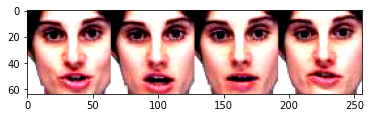

In [ ]:
plt.imshow(0.5 + tmp.permute(1, 2, 0)/2)

In [60]:
pbar = tqdm(range(2000))
for i in pbar:
  time.sleep(0.001)
  pbar.set_description(f"TIME is : {time.time()}TIME is : {time.time()}TIME is : {time.time()}TIME is : {time.time()}TIME is : {time.time()}TIME is : {time.time()}")

TIME is : 1638414090.7201345TIME is : 1638414090.720142TIME is : 1638414090.720144TIME is : 1638414090.7201455TIME is : 1638414090.7201471TIME is : 1638414090.7201488: 100%|██████████| 2000/2000 [00:05<00:00, 354.24it/s]
